In [105]:
#Importamos librerías 
import numpy as np 
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [106]:
#Se crean los objetos antecedentes y consecuentes
x_calidad = np.arange(0, 11, 1)
x_servicio = np.arange(0, 11, 1)
x_propina = np.arange(0, 26, 1)

#Generamos permanencias difusas
calidad_baja = fuzz.trimf(x_calidad, [0, 0, 5])
calidad_media = fuzz.trimf(x_calidad, [0, 5, 10])
calidad_alta = fuzz.trimf(x_calidad, [5, 10, 10])

servicio_baja = fuzz.trimf(x_servicio, [0, 0, 5])
servicio_media = fuzz.trimf(x_servicio, [0, 5, 10])
servicio_alta = fuzz.trimf(x_servicio, [5, 10, 10])

propina_baja = fuzz.trimf(x_propina, [0, 0, 13])
propina_media = fuzz.trimf(x_propina, [0, 13, 25])
propina_alta = fuzz.trimf(x_propina, [13, 25, 25])

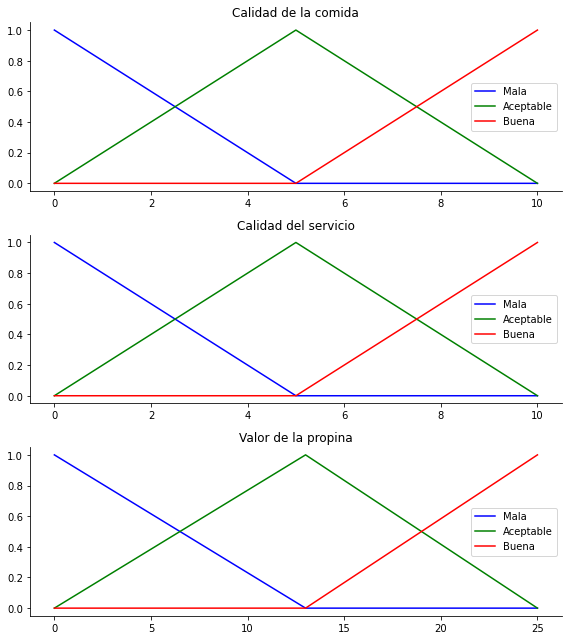

In [107]:
#Visualizar universos y funciones de pertenencias
fig, (ax0, ax1, ax2) = plt.subplots(nrows = 3, figsize = (8, 9))

#Calidad
ax0.plot(x_calidad, calidad_baja, 'b', linewidth = 1.5, label = "Mala")
ax0.plot(x_calidad, calidad_media, 'g', linewidth = 1.5, label = "Aceptable")
ax0.plot(x_calidad, calidad_alta, 'r', linewidth = 1.5, label = "Buena")
ax0.set_title("Calidad de la comida")
ax0.legend()

#Servicio
ax1.plot(x_servicio, servicio_baja, 'b', linewidth = 1.5, label = "Mala")
ax1.plot(x_servicio, servicio_media, 'g', linewidth = 1.5, label = "Aceptable")
ax1.plot(x_servicio, servicio_alta, 'r', linewidth = 1.5, label = "Buena")
ax1.set_title("Calidad del servicio")
ax1.legend()

#Propina
ax2.plot(x_propina, propina_baja, 'b', linewidth = 1.5, label = "Mala")
ax2.plot(x_propina, propina_media, 'g', linewidth = 1.5, label = "Aceptable")
ax2.plot(x_propina, propina_alta, 'r', linewidth = 1.5, label = "Buena")
ax2.set_title("Valor de la propina")
ax2.legend()

#Ocultar eje Superior/Derecha
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()

In [108]:
nivel_calidad_baja = fuzz.interp_membership(x_calidad, calidad_baja, 6.5)
nivel_calidad_media = fuzz.interp_membership(x_calidad, calidad_media, 6.5)
nivel_calidad_alto = fuzz.interp_membership(x_calidad, calidad_alta, 6.5)

nivel_servicio_baja = fuzz.interp_membership(x_servicio, servicio_baja, 9.5)
nivel_servicio_media = fuzz.interp_membership(x_servicio, servicio_media, 9.5)
nivel_servicio_alto = fuzz.interp_membership(x_servicio, servicio_alta, 9.5)

activar_regla1 = np.fmax(nivel_calidad_baja, nivel_servicio_baja)
activacion_propina_baja = np.fmin(activar_regla1, propina_baja)

activar_regla2 = np.fmax(nivel_calidad_media, nivel_servicio_media)
activacion_propina_media = np.fmin(activar_regla2, propina_media)

activar_regla3 = np.fmax(nivel_calidad_alto, nivel_servicio_alto)
activacion_propina_alta = np.fmin(activar_regla1, propina_alta)



In [109]:
#Agregar las tres funciones de pertenecia de la salida  juntas
agregado = np.fmax(activacion_propina_baja, np.fmax(activacion_propina_media, activacion_propina_alta))
propina0 = np.zeros_like(x_propina)
#Calcular el resultado difuso
propina = fuzz.defuzz(x_propina, agregado, 'centroide')
activacion_propina = fuzz.interp_membership(x_propina, agregado, propina) #Para dibujar


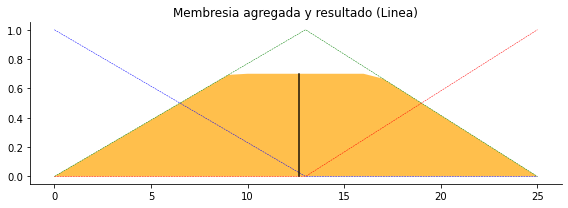

In [110]:
#Visualizaciones
fig, ax0 = plt.subplots(figsize = (8, 3))

ax0.plot(x_propina, propina_baja, 'b', linewidth = 0.5, linestyle = '--')
ax0.plot(x_propina, propina_media, 'g', linewidth = 0.5, linestyle = '--')
ax0.plot(x_propina, propina_alta, 'r', linewidth = 0.5, linestyle = '--')
ax0.fill_between(x_propina, propina0, agregado, facecolor = 'Orange', alpha = 0.7)
ax0.plot([propina, propina], [0, activacion_propina], 'k', linewidth = 1.5, alpha = 0.9)
ax0.set_title("Membresia agregada y resultado (Linea)")

#Ocultar eje Superior/Derecha
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()